# $$ \textbf{Toyota Corolla Prices Prediction} $$


## Problem Statement
***
The prices of Brand new cars in the industry is fixed by the manufacturer with some additional costs incurred by the Government in the form of taxes. So, customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales are on a global increase. There is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features. Even though there are websites that offers this service, their prediction method may not be the best. Besides, different models and systems may contribute on predicting power for a used car’s actual market value. It is important to know their actual market value while both buying and selling.
***

## Objective
***
**To be able to predict used cars market value that can help both buyers and sellers.**
***

## Data
***
The data used in this project was downloaded from Kaggle. The link of the source is given below.

[Data Source Link](https://www.kaggle.com/code/tolgahancepel/toyota-corolla-prices-regression-analysis/data)

## Data Description


***
1) **Age :** Age in months\
2) **KM :** Accumulated Kilometers on odometer. (An odometer keeps track of distance travelled)\
3) **FuelType :** Fuel Type (Petrol, Diesel, CNG)\
4) **HP :** Horse Power\
5) **Price :** Offer Price in EUROs\
6) **Automatic :** Automatic ( Yes=1, No=0)\
7) **CC :** Cylinder Volume in cubic centimeters\
8) **Doors :** Number of doors\
9) **Weight :** Weight in Kilograms\
10) **MetColor :** Metallic Color (Yes=1, No=0)\
11) **Model :** Model Name
***

## Importing Libraries and Reading the Dataset

- Importing required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from xgboost.sklearn import XGBRegressor
import warnings 

- Importing my dataset.

In [2]:
dataset = pd.read_excel("C:/Users/akhil/Toyota.xlsx")
dataset

,Model,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,46986,Diesel,90,1,0,2000,3,1165,13500
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,72937,Diesel,90,1,0,2000,3,1165,13750
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,41711,Diesel,90,1,0,2000,3,1165,13950
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,48000,Diesel,90,0,0,2000,3,1165,14950
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,30,38500,Diesel,90,0,0,2000,3,1170,13750
...,...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,69,20544,Petrol,86,1,0,1300,3,1025,7500
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,72,19000,Petrol,86,0,0,1300,3,1015,10845
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,71,17016,Petrol,86,0,0,1300,3,1015,8500
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,70,16916,Petrol,86,1,0,1300,3,1015,7250


- Observing the first five and last five values from Dataset.

In [3]:
dataset.head()

,Model,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,46986,Diesel,90,1,0,2000,3,1165,13500
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,72937,Diesel,90,1,0,2000,3,1165,13750
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,41711,Diesel,90,1,0,2000,3,1165,13950
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,48000,Diesel,90,0,0,2000,3,1165,14950
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,30,38500,Diesel,90,0,0,2000,3,1170,13750


In [4]:
dataset.tail()

,Model,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,69,20544,Petrol,86,1,0,1300,3,1025,7500
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,72,19000,Petrol,86,0,0,1300,3,1015,10845
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,71,17016,Petrol,86,0,0,1300,3,1015,8500
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,70,16916,Petrol,86,1,0,1300,3,1015,7250
1435,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,76,1,Petrol,110,0,0,1600,5,1114,6950


In [5]:
dataset.shape

(1436, 11)

In [6]:
warnings.filterwarnings('ignore')

## EDA  (Exploratory Data Analysis )

- General information about the dataset.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      1436 non-null   object
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
 10  Price      1436 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 123.5+ KB


- Given are the value counts of the Model from the dataset.

In [8]:
print(dataset['Model'].value_counts())

TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors     107
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      83
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors        79
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors       70
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors       43
                                                       ... 
TOYOTA Corolla 2.0D 4/5-Doors                             1
TOYOTA Corolla 1.6 16v TERRA 4/5-Doors                    1
TOYOTA Corolla 1.6 HB SOL 2/3-Doors                       1
 TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      1
TOYOTA Corolla 1.3 Linea Terra 4/5-Doors                  1
Name: Model, Length: 372, dtype: int64


**Note :**  Here, Target variable is price (in euros).

- If some unwanted columns are present in dataset that will create no impact in our model.     we can drop those columns. Here Model (unwanted feature) is not necesarry in the dataset.
- dropping the Model column.


In [9]:
ds = dataset.drop(['Model'],axis='columns')
ds

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price
0,23,46986,Diesel,90,1,0,2000,3,1165,13500
1,23,72937,Diesel,90,1,0,2000,3,1165,13750
2,24,41711,Diesel,90,1,0,2000,3,1165,13950
3,26,48000,Diesel,90,0,0,2000,3,1165,14950
4,30,38500,Diesel,90,0,0,2000,3,1170,13750
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,1,0,1300,3,1025,7500
1432,72,19000,Petrol,86,0,0,1300,3,1015,10845
1433,71,17016,Petrol,86,0,0,1300,3,1015,8500
1434,70,16916,Petrol,86,1,0,1300,3,1015,7250


- column names 

In [10]:
ds.columns.values

array(['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'Price'], dtype=object)

- variable type 

In [11]:
ds.dtypes

Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
Price         int64
dtype: object

- count of every column in dataset.

In [12]:
ds.count()

Age          1436
KM           1436
FuelType     1436
HP           1436
MetColor     1436
Automatic    1436
CC           1436
Doors        1436
Weight       1436
Price        1436
dtype: int64

In [13]:
ds.describe()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112,3626.964585
min,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000,32500.000000


In [14]:
ds.shape

(1436, 10)

- dataset.isnull() : This returns boolean value for every column in the data frame.
- i.e. If the value is null it returns True, and False values are other than null.

In [15]:
ds.isnull()

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False


- ds.isnull().sum() give you total number of null values in each features in the data set.

In [16]:
ds.isnull().sum()

Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
Price        0
dtype: int64

- We can verify, If the output is zero, it means that there are no missing values left in our dataset now.

In [17]:
ds.isnull().sum().sum()

0


* There are 1436 rows (starting from 0) and 10 columns.
* There is no null value in the data. 
> A NULL value is used to indicate that a data value does not exist in the database. In other words, it is just a placeholder to denote values that are missing or that we do not know.


* How to treat null values:
> * You can drop the missing values with the code dataset.drop(). This will drop all the rows which contain the missing value.
> * You can fill the missing values with the code dataset.fillna(0). You should specify what you want to fill in place of missing values.
>> * In the case of numerical columns, replace missing values with the median value of that column.
>> * In the case of categorical columns, we will replace missing values with the mode values of that column.

- The value_counts() method returns a series containing the counts of unique values. This means, for any column in a dataset, this returns the count of unique entries in that column.

In [18]:
print('Value Counts\n',ds['FuelType'].value_counts())

Value Counts
 Petrol    1264
Diesel     155
CNG         17
Name: FuelType, dtype: int64


In [19]:
print('Value Counts\n',ds['MetColor'].value_counts())

Value Counts
 1    969
0    467
Name: MetColor, dtype: int64


In [20]:
print('Value Counts\n',ds['Automatic'].value_counts())

Value Counts
 0    1356
1      80
Name: Automatic, dtype: int64


In [21]:
print('Value Counts\n',ds['Doors'].value_counts())

Value Counts
 5    674
3    622
4    138
2      2
Name: Doors, dtype: int64


In [22]:
print('Value Counts\n',ds['CC'].value_counts())

Value Counts
 1600    846
1300    248
1400    164
2000    119
1900     30
1800     14
1598      4
1587      4
1995      2
1398      2
1332      2
1975      1
Name: CC, dtype: int64


- We use unique() to check if there is any duplicate entry in a column except for a Null value.

In [23]:
print('Unique values\n',ds['HP'].unique())

Unique values
 [ 90 192  69 110  97  71 116  98  86  72 107  73]


In [24]:
print('Unique values\n',ds['FuelType'].unique())

Unique values
 ['Diesel' 'Petrol' 'CNG']


In [25]:
print('Unique values\n',ds['Weight'].unique())

Unique values
 [1165 1170 1245 1185 1105 1065 1120 1100 1255 1270 1110 1195 1180 1075
 1130 1275 1060 1115 1265 1260 1125 1155 1045 1480 1320 1280 1135 1090
 1150 1085 1160 1205 1084 1140 1095 1025 1119 1080 1121 1615 1067 1040
 1030 1055 1050 1103 1070 1035 1015 1000 1078 1079 1109 1020 1010 1114
 1172 1094 1083]


In [26]:
print('Unique values\n',ds['KM'].unique())

Unique values
 [46986 72937 41711 ... 19000 17016 16916]


In [27]:
print('Unique values\n',ds['Age'].unique())

Unique values
 [23 24 26 30 32 27 25 22 31 28 29 20 19 16 17 11 18 13 14  4  8  7 15 10
 12  9  6  2  1 43 38 40 44 41 37 39 42 35 34 33 36 53 51 54 45 55 48 52
 49 56 50 47 46 58 68 59 62 65 67 64 60 61 66 57 63 73 79 78 74 77 69 80
 76 70 71 75 72]


In [28]:
print('Unique values\n',ds['MetColor'].unique())

Unique values
 [1 0]


In [29]:
print('Unique values\n',ds['Automatic'].unique())

Unique values
 [0 1]


In [30]:
print('Unique values\n',ds['CC'].unique())

Unique values
 [2000 1800 1900 1600 1400 1598 1995 1398 1300 1587 1975 1332]


In [31]:
print('Unique values\n',ds['Doors'].unique())

Unique values
 [3 5 4 2]


In [32]:
# Checking uniqueness is not necessary in numerical values but in catagorical data we generally use this.

## Data Visualization

### 1)  Numerical data


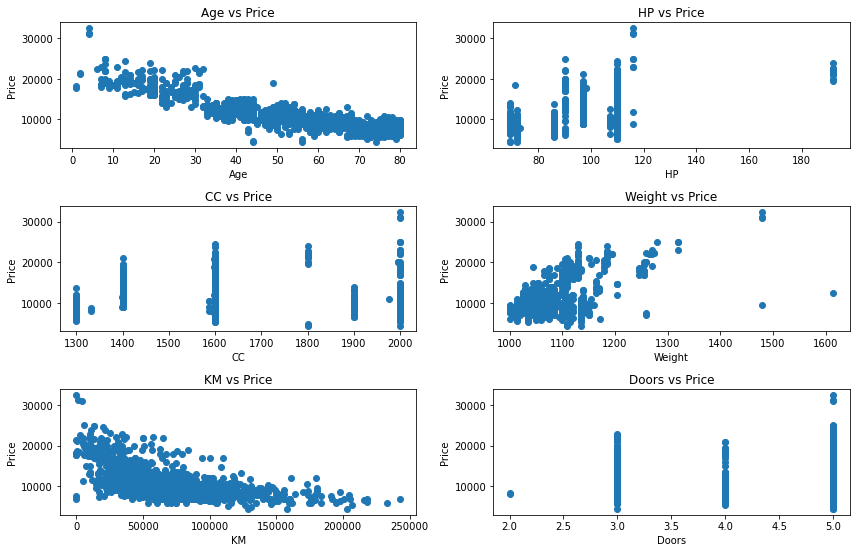

In [33]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    plt.scatter(ds[x],ds['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(12,15))

scatter('Age', 1)
scatter('HP', 2)
scatter('CC', 3)
scatter('Weight', 4)
scatter('KM',5)
scatter('Doors',6)

plt.tight_layout()

Observations :
- Weight seem to have a significant positive correlation with price.
- CC, Doors and HP doesn't show any significant trend with price.
- Age and KM seem to have a significant negative correlation with price.

####   Age 

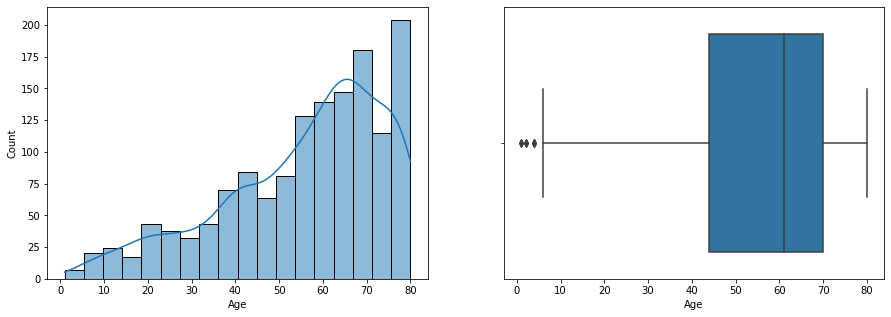

In [34]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(ds['Age'], ax = ax[0], kde=True)     ## Age Visualization
sns.boxplot(data = ds, x = ds['Age'], ax = ax[1])
plt.show()

#### KM

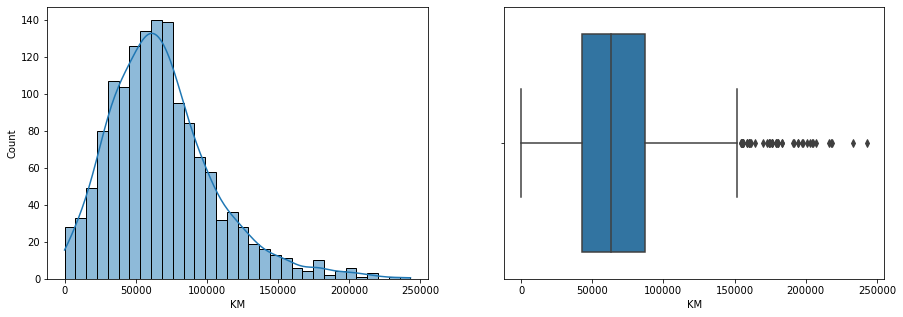

In [35]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(ds['KM'], ax = ax[0], kde=True)     ## KM Visualization
sns.boxplot(data = ds, x = ds['KM'], ax = ax[1])
plt.show()

#### HP

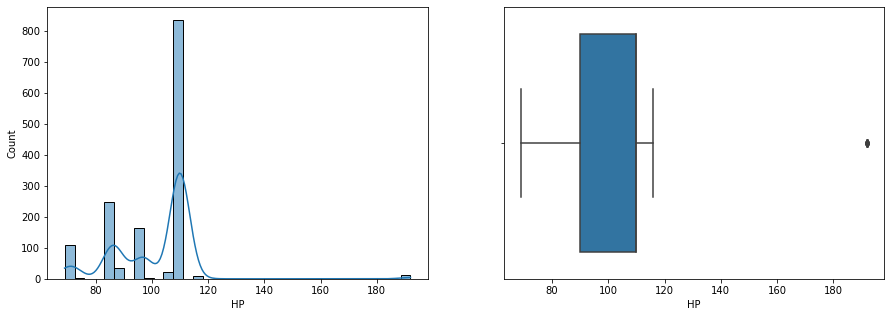

In [36]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(ds['HP'], ax = ax[0], kde=True)     ## HP Visualization
sns.boxplot(data = ds, x = ds['HP'], ax = ax[1])
plt.show()

#### Weight

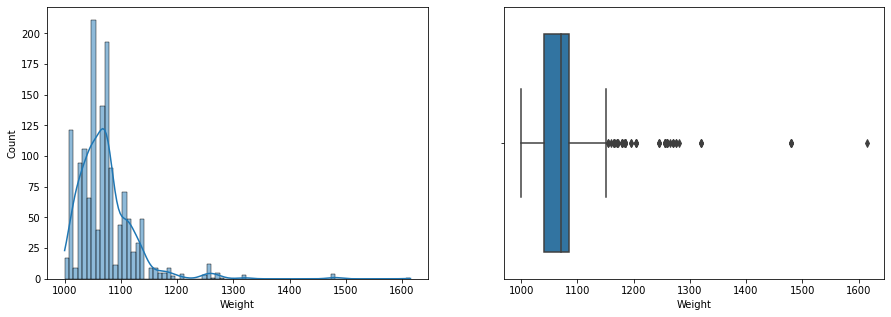

In [37]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(ds['Weight'], ax = ax[0], kde=True)     ## Weight Visualization
sns.boxplot(data = ds, x = ds['Weight'], ax = ax[1])
plt.show()

#### Price

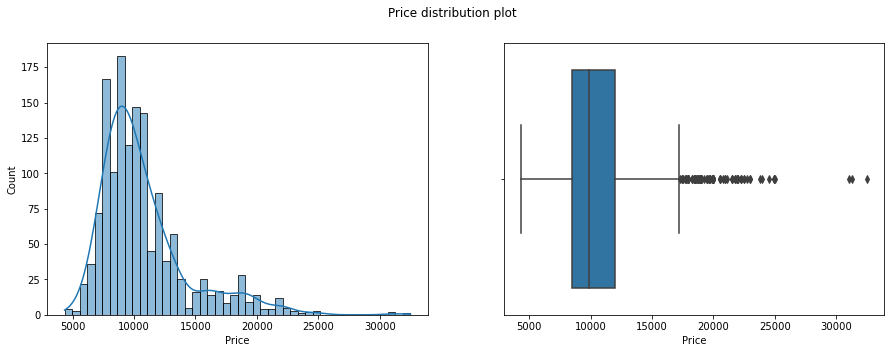

In [38]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(ds['Price'], ax = ax[0], kde=True)   ## Price Visualization
fig.suptitle('Price distribution plot')
sns.boxplot(data = ds, x = ds['Price'], ax = ax[1])
plt.show()

In [39]:
print(ds.Price.describe())

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64


#### 2)  Categorical data

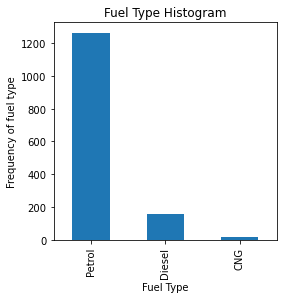

In [40]:
plt.figure(figsize=(4, 4))
plt1 = ds.FuelType.value_counts().plot(kind ='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')
plt.show()

observations :
- Number of petrol using cars are more than diesel and CNG. 


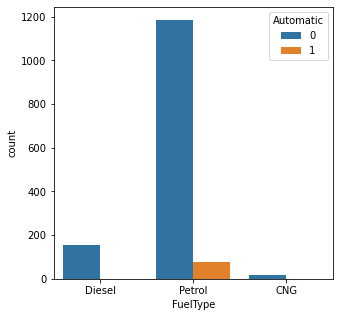

In [41]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(5,5))      
sns.countplot(ds['FuelType'], hue='Automatic', data=ds)
plt.show()

Observations :
- We can see that number of not automatic cars are more than the automatic ones.
- In petrol, there are more automatic cars than CNG.

[]

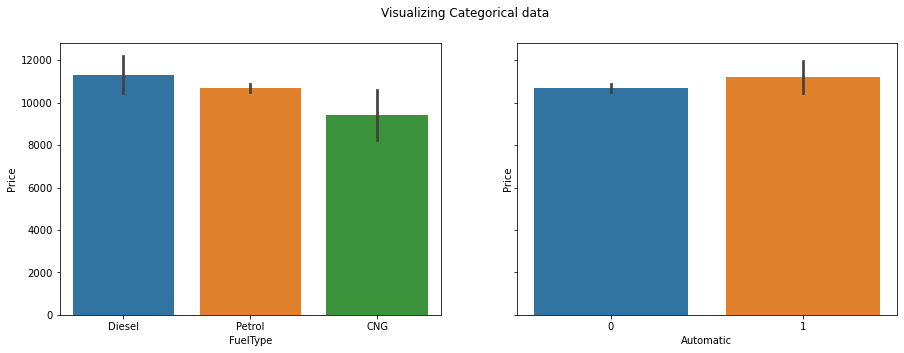

In [42]:
FuelType = ds['FuelType']
Automatic = ds['Automatic']
Price= ds['Price']
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey = True)
fig.suptitle('Visualizing Categorical data')
sns.barplot(x=FuelType, y=Price, ax = axes[0])
sns.barplot(x=Automatic, y=Price, ax=axes[1])
plt.plot()

Observation :
- Based on fueltype, Diesel cars has higher price than petrol and CNG type.
- Automatic vehicles has high price.

- **Outlier** : An outlier is an unusual observation that lies away from the majority of the data. Outliers can affect the performance of a model significantly. Hence, it becomes important to identify outliers and treat them.

- We can either drop the observations that we think are outliers, or we can replace the outliers with suitable values, or we can perform some sort of transformation on the data (like log or exponential). 

##  Data Cleaning

In [43]:
A = ds['Age']<20
median = ds['Age'].median()
ds['Age'][A] = median

- The Legal age for driving is 18 years. So, I considered Age greater than 20.


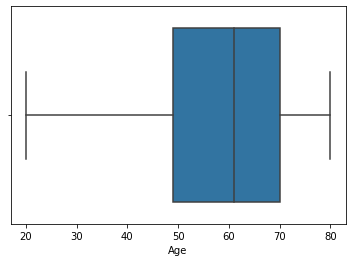

In [44]:
sns.boxplot(data = ds, x = ds['Age'])
plt.show()

In [45]:
B = ds['HP']>180
median = ds['HP'].median()
ds['HP'][B] = median

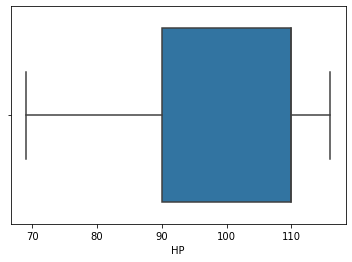

In [46]:
sns.boxplot(data = ds, x = ds['HP'])
plt.show()

### Correlation Using heatmap

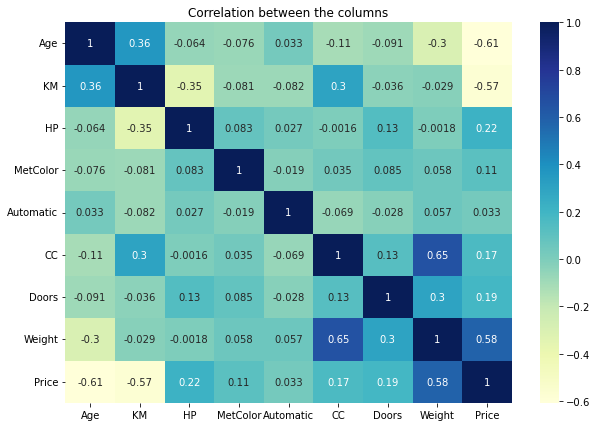

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(ds.corr(), annot = True, cmap="YlGnBu")
plt.title('Correlation between the columns')
plt.show()

Observations :
- Lighter value indicates the low correlation and darker value indicates high correlation.
- High correlated vriables to prices are weight, HP. 

In [48]:
ds.corr()['Price'].sort_values()

Age         -0.606644
KM          -0.569960
Automatic    0.033081
MetColor     0.108905
CC           0.165067
Doors        0.185326
HP           0.221646
Weight       0.581198
Price        1.000000
Name: Price, dtype: float64

- As we can see data is arranged assending order and most correlated attribute to the price of a car is wieght.
- Now we will plot regression plot between them.

<Figure size 216x360 with 0 Axes>

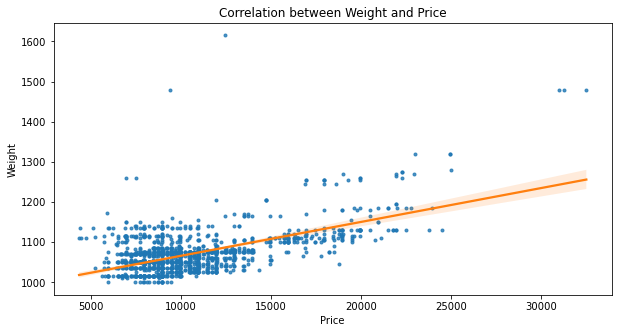

In [49]:
fig = plt.figure(figsize=(3,5))
fig, axes = plt.subplots( figsize=(10,5), sharey = True)
plt.title('Correlation between Weight and Price')
sns.regplot(x='Price',y='Weight',data= ds,line_kws={"color": "C1"},marker ='.')
plt.show()

- A good majority of the points passes through the straight line.
- The Weight is positively correlated with Price.

### Convert Non-numerical Data into Numerical

In [50]:
#encoding
Numeric = LabelEncoder()

In [51]:
#New encoded columns
ds['FuelType_n'] = Numeric.fit_transform(ds['FuelType'])
ds  

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price,FuelType_n
0,23,46986,Diesel,90,1,0,2000,3,1165,13500,1
1,23,72937,Diesel,90,1,0,2000,3,1165,13750,1
2,24,41711,Diesel,90,1,0,2000,3,1165,13950,1
3,26,48000,Diesel,90,0,0,2000,3,1165,14950,1
4,30,38500,Diesel,90,0,0,2000,3,1170,13750,1
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,1,0,1300,3,1025,7500,2
1432,72,19000,Petrol,86,0,0,1300,3,1015,10845,2
1433,71,17016,Petrol,86,0,0,1300,3,1015,8500,2
1434,70,16916,Petrol,86,1,0,1300,3,1015,7250,2


- In above dataset, coverted values are 1- diesel , 2-petrol , 0-CNG. Now dropping string columns from dataset.

In [52]:
ds_n = ds.drop(['FuelType'],axis='columns')
ds_n

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Price,FuelType_n
0,23,46986,90,1,0,2000,3,1165,13500,1
1,23,72937,90,1,0,2000,3,1165,13750,1
2,24,41711,90,1,0,2000,3,1165,13950,1
3,26,48000,90,0,0,2000,3,1165,14950,1
4,30,38500,90,0,0,2000,3,1170,13750,1
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1,0,1300,3,1025,7500,2
1432,72,19000,86,0,0,1300,3,1015,10845,2
1433,71,17016,86,0,0,1300,3,1015,8500,2
1434,70,16916,86,1,0,1300,3,1015,7250,2


- "ds_n" is the new name of the dataset.

## Model Building

- Splitting the data into train and test set.
- Price is target variable, rest all are features.

In [53]:
X = ds_n.drop(columns='Price',axis=1)
y = ds_n[['Price']]

In [54]:
print('Shape of X is : ', X.shape)
print('Shape of y is : ', y.shape)

Shape of X is :  (1436, 9)
Shape of y is :  (1436, 1)


In [55]:
X

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_n
0,23,46986,90,1,0,2000,3,1165,1
1,23,72937,90,1,0,2000,3,1165,1
2,24,41711,90,1,0,2000,3,1165,1
3,26,48000,90,0,0,2000,3,1165,1
4,30,38500,90,0,0,2000,3,1170,1
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1,0,1300,3,1025,2
1432,72,19000,86,0,0,1300,3,1015,2
1433,71,17016,86,0,0,1300,3,1015,2
1434,70,16916,86,1,0,1300,3,1015,2


In [56]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


- Now we are going to use train test split.

In [57]:
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.3) # here my test size 30%.

In [58]:
print('Shape of X_train is : ', X_train.shape)
print('Shape of y_train is : ', y_train.shape)
print('Shape of X_test is : ', X_test.shape)
print('Shape of y_test is : ', y_test.shape)

Shape of X_train is :  (1005, 9)
Shape of y_train is :  (1005, 1)
Shape of X_test is :  (431, 9)
Shape of y_test is :  (431, 1)


### Linear Regression

scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)  #Standardization of features.
X_test= scaler.fit_transform(X_test)    

In [59]:
linreg=LinearRegression()        #Fitting the Model. 
linreg.fit(X_train,y_train)
linreg_pred=linreg.predict(X_test)

In [60]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)    #Calculating Mean Absolute error.
linreg_r2 = r2_score(y_test, linreg_pred)                #Calculating r2 score.
print("MAE of linear regression model is :", linreg_mae)
print("R2 score of linear regression model is : ",linreg_r2)

MAE of linear regression model is : 1250.9311826329917
R2 score of linear regression model is :  0.732816155798204


In [61]:
#display adjusted R-squared
Adjusted_R_sqaure = 1 - (1-linreg.score(X_train, y_train))*(len(y)-1)/(len(y)-X.shape[1]-1)
Adjusted_R_sqaure

0.7174966281240627

In [62]:
# Now performing crossvalidation on test data and see the model accuracy.
linreg_score = cross_val_score(linreg, X_test, y_test, cv = 4)   #Calculating cross validation score.
print('Linear Regression model accuracy is : {}'.format(linreg_score.mean()*100))

Linear Regression model accuracy is : 62.600191537383886


- Cross-validation is a powerful preventative measure against overfitting.
- When we use cross validation, It verifies how accurate the model is on multiple and different subsets of data.
- It improves the accuracy of the model.

### Another method for linear regression

In [63]:
model = sm.OLS.from_formula('Price~Age+KM+HP+MetColor+Automatic+CC+Doors+Weight+FuelType_n', ds_n)  #Building the model.
result = model.fit()
print(result.summary())        

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     420.0
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:09:17   Log-Likelihood:                -12877.
No. Observations:                1436   AIC:                         2.577e+04
Df Residuals:                    1426   BIC:                         2.583e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.403e+04   1597.178    -15.044      0.0

Observations :
- MetColor, Automatic, Doors, FuelType_n has p values greater than 0.05. Hence, they are not impactful.  
- So, we will drop these features.

- The p-value is the probability that the null hypothesis is true. 
- (1 – (p-value)) is the probability that the alternative hypothesis is true.

In [64]:
model = sm.OLS.from_formula('Price~Age+KM+HP+CC+Weight', ds_n)
result = model.fit()
print(result.summary())      

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     748.6
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:09:17   Log-Likelihood:                -12884.
No. Observations:                1436   AIC:                         2.578e+04
Df Residuals:                    1430   BIC:                         2.581e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.169e+04   1325.895    -16.359      0.0

Observations :
- Now, all the features has p value less than 0.05.
- If R2 and Adjusted_R2 values are nearly equal then we say the Model is better.
- R-sqaured and Adjusted R-squared - 0.726 and 0.724.
- F-stats and Prob(F-stats)- 748.6 and approximately 0.0. 
- p-values for all the coefficients seem to be less than the significance level of 0.05.
- meaning that all the predictors are statistically significant.

#### code for VIF calculation

In [65]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x =x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.OLS.from_formula("y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(xvar_names[i], 'VIF - ', vif)

In [66]:
X_data = ds_n.drop(['MetColor','FuelType_n','Doors','Automatic','Price'], axis=1)

In [67]:
vif_cal(input_data=X_data)

Age VIF -  1.29
KM VIF -  1.65
HP VIF -  1.18
CC VIF -  2.19
Weight VIF -  2.03


Observations :
- VIF of all the features are less than 5. It means there is moderate Multicollinearity.
- So, we will not drop anything.

### Decision Tree

In [68]:
dtree = DecisionTreeRegressor(max_depth=7)  #Fitting the model.
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [69]:
feature = ['Age','KM','HP','MetColor','Automatic','CC','Doors','Weight','FuelType_n'] 

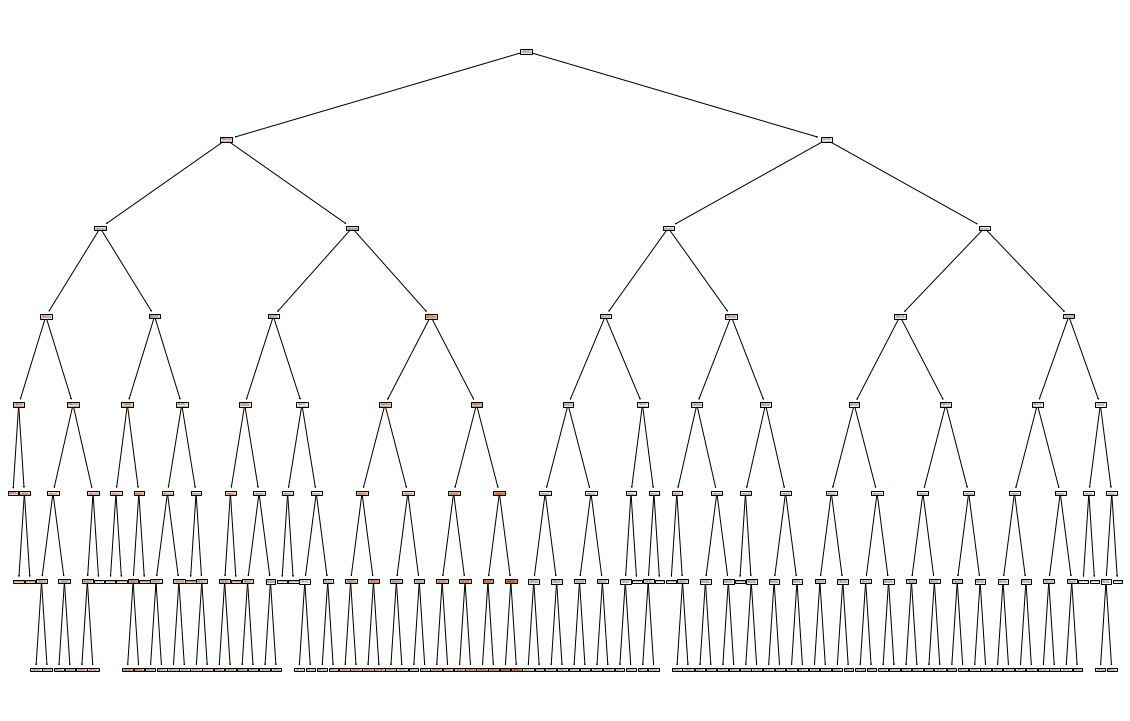

In [70]:
DTree = tree.DecisionTreeRegressor(max_depth=7)   #Tree visualization for decision tree regressor. 
DTree.fit(X,y)

plt.figure(figsize=(20,13))
plot_tree(DTree, filled=True, 
                     impurity=False,
                      feature_names = feature)
plt.show()

In [71]:
dtree_pred = dtree.predict(X_train)                      #Training accuracy.
dtree_mse = mean_squared_error(y_train, dtree_pred)      #Calculating the mean squared error.
dtree_mae = mean_absolute_error(y_train, dtree_pred)     #Calculating the mean absolute error.
dtree_r2 = r2_score(y_train, dtree_pred)                 #Calculating r2 score.
print("MSE of decision tree is :", dtree_mse)
print("MAE of decision tree is :", dtree_mae)
print("R2 score of decision tree model is : ",dtree_r2)

MSE of decision tree is : 854707.1854886025
MAE of decision tree is : 671.4020283302535
R2 score of decision tree model is :  0.9296382148493937


In [72]:
dtree_score = cross_val_score(dtree, X_train, y_train, cv = 10)  #Calculating cross validation score.
print('Decision tree model accuracy for train data is : {}'.format(dtree_score.mean()*100))

Decision tree model accuracy for train data is : 79.66918558919599


In [73]:
dtree_pred = dtree.predict(X_test)                         #Test accuracy.
dtree_mse = mean_squared_error(y_test, dtree_pred)         #Calculating the mean squared error.
dtree_mae = mean_absolute_error(y_test, dtree_pred)        #Calculating the mean absolute error.
dtree_r2 = r2_score(y_test, dtree_pred)                    #Calculating r2 score. 
print("MSE of decision tree is :", dtree_mse)
print("MAE of decision tree is :", dtree_mae)
print("R2 score of decision tree model is : ",dtree_r2)


MSE of decision tree is : 3348735.1464163866
MAE of decision tree is : 1128.243150552865
R2 score of decision tree model is :  0.7831056809456072


In [74]:
dtree_score = cross_val_score(dtree, X_test, y_test, cv = 10)  #Calculating cross validation score.
print('Decision tree model accuracy for test data is : {}'.format(dtree_score.mean()*100))

Decision tree model accuracy for test data is : 65.85797550035532


### Random Forest

In [75]:
regressor_rf = RandomForestRegressor(n_estimators = 200, random_state = 0, max_depth=7)
regressor_rf.fit(X_train, y_train)         # Fitting the Random Forest Regression to the dataset.

RandomForestRegressor(max_depth=7, n_estimators=200, random_state=0)

In [76]:
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train)  # Predicting Cross Validation Score

y_pred_rf_train = regressor_rf.predict(X_train)     # Predicting R2 Score the Train set results.
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = regressor_rf.predict(X_test)       # Predicting R2 Score the Test set results.
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)

CV:  0.8631058475577419
R2_score (train):  0.9423744615839722
R2_score (test):  0.8641727841051168


### Boosting model
#### GBM (Gradient Boosting Method)

In [77]:
boost=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, verbose=1)    # Building the GBM

In [78]:
boost.fit(X_train,y_train)     #Fitting the gradient boost classifier

      Iter       Train Loss   Remaining Time 
         1    10444154.0005            0.00s
         2     9061918.0040            0.28s
         3     7844837.1491            0.32s
         4     6876118.6957            0.24s
         5     6066660.2950            0.26s
         6     5366022.6852            0.22s
         7     4811956.7308            0.18s
         8     4318954.6054            0.23s
         9     3920607.5893            0.22s
        10     3561349.6560            0.20s
        20     1786100.1752            0.16s
        30     1338144.3460            0.12s
        40     1182218.9682            0.09s
        50     1092701.6507            0.07s
        60     1033175.4241            0.05s
        70      990570.0182            0.04s
        80      941735.4315            0.02s
        90      914987.2101            0.01s
       100      882904.8844            0.00s


GradientBoostingRegressor(verbose=1)

In [79]:
predict_train = boost.predict(X_train)  # Prediction on train data.
predict_test = boost.predict(X_test)    # Prediction on test data.

In [80]:
#print(predict_train)
#print(predict_test)

In [81]:
print("Train accuracy = ", boost.score(X_train,y_train))  # Checking accuracy on train data.
print("Test accuracy = " , boost.score(X_test,y_test))    # Checking accuracy on test data.

Train accuracy =  0.9273169047373406
Test accuracy =  0.8426413609672446


#### XGB (Xtreme Gradient Boosting)

In [82]:
XGB = XGBRegressor( n_estimators = 10, max_depth= 4)
fit = XGB.fit(X_train,y_train)

In [83]:
print("The train accuracy = " , fit.score(X_train,y_train))
print("The test accuracy ="  , fit.score(X_test , y_test))

The train accuracy =  0.9025283579389394
The test accuracy = 0.8053795153875372


In [84]:
resultdata =[['Linear Regression',0.7826,0.6933],
             ['Linear Regression (OLS)',0.726,0.724]]
            
result_df = pd.DataFrame(resultdata,columns=['Models','R2','Adjsuted_R2'])
result_df

,Models,R2,Adjsuted_R2
0,Linear Regression,0.7826,0.6933
1,Linear Regression (OLS),0.7260,0.7240


In [85]:
resultdata =[
            ['Decision Tree',0.8314,0.8177],
            ['Random Forest',0.9424,0.9103],
            ['Gradient Boosting',0.9318,0.9146],
             ['XGB',0.9010,0.8888]]

result_df = pd.DataFrame(resultdata,columns=['Models','Training Accuracy','Test Accuracy'])
result_df

,Models,Training Accuracy,Test Accuracy
0,Decision Tree,0.8314,0.8177
1,Random Forest,0.9424,0.9103
2,Gradient Boosting,0.9318,0.9146
3,XGB,0.9010,0.8888


In [86]:
result_df = result_df.sort_values(by='Test Accuracy',ascending=False)
result_df

,Models,Training Accuracy,Test Accuracy
2,Gradient Boosting,0.9318,0.9146
1,Random Forest,0.9424,0.9103
3,XGB,0.9010,0.8888
0,Decision Tree,0.8314,0.8177


### Feature Importance Graph

In [115]:
imp_features = dtree.feature_importances_
imp_features = pd.DataFrame(data={'Features':X.columns,'Decision Tree IMP Features':imp_features})
imp_features

,Features,Decision Tree IMP Features
0,Age,0.480939
1,KM,0.099546
2,HP,0.180785
3,MetColor,0.001103
4,Automatic,0.000585
5,CC,0.001484
6,Doors,0.000547
7,Weight,0.235010
8,FuelType_n,0.000000


In [116]:
imp_features = imp_features.sort_values(by='Decision Tree IMP Features',ascending=False)
imp_features

,Features,Decision Tree IMP Features
0,Age,0.480939
7,Weight,0.235010
2,HP,0.180785
1,KM,0.099546
5,CC,0.001484
3,MetColor,0.001103
4,Automatic,0.000585
6,Doors,0.000547
8,FuelType_n,0.000000


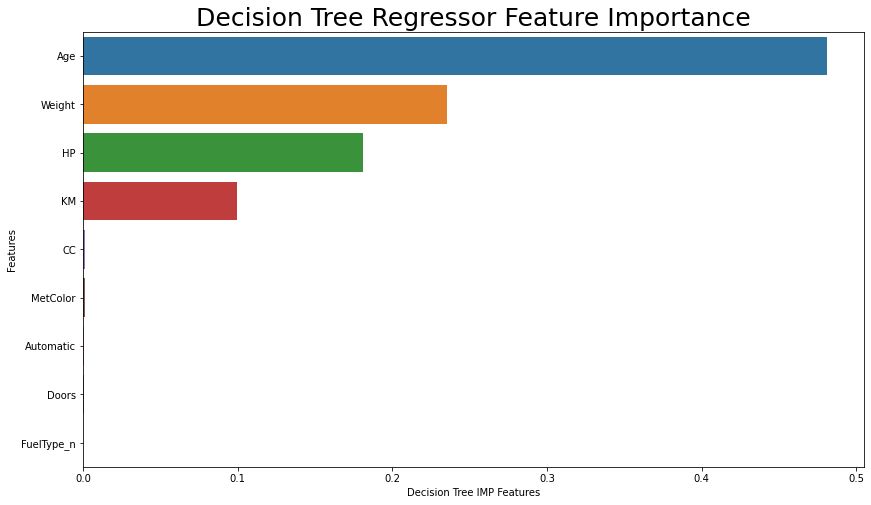

In [117]:
plt.figure(figsize=(14,8))
sns.barplot(x='Decision Tree IMP Features',y='Features',data=imp_features)
plt.title('Decision Tree Regressor Feature Importance',size=25)
plt.show()

### Checking

In [91]:
ds_n.columns

Index(['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight',
       'Price', 'FuelType_n'],
      dtype='object')

In [92]:
ds_n.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Price,FuelType_n
0,23,46986,90,1,0,2000,3,1165,13500,1
1,23,72937,90,1,0,2000,3,1165,13750,1
2,24,41711,90,1,0,2000,3,1165,13950,1
3,26,48000,90,0,0,2000,3,1165,14950,1
4,30,38500,90,0,0,2000,3,1170,13750,1


In [93]:
data = {'Age':23,'KM':46986,'HP':50,'MetColor':1,'Automatic':0,'CC':2000,'Doors':4,'Weight':1165,'FuelType_n':1}
index = [0]
new_df = pd.DataFrame(data,index)
new_df

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_n
0,23,46986,50,1,0,2000,4,1165,1


In [111]:
#now my new dataframe ready to pass it.
new_pred = dtree.predict(new_df)
print(" The car price for the new data is : ",new_pred)

 The car price for the new data is :  [12950.]
